원래 데이터 이름 : LTC_3rd_ORIGIN_LTCONLINE_20200101000000

변경 후 이름 : OnlineCard

datalink : https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=LTCONLINE

In [59]:
import os

import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import animation, rc
import seaborn as sns

import plotly.express as px
import folium
from folium import plugins
import branca
import json

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pio.renderers.default = "notebook_connected"

In [60]:
os.chdir('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data')

In [61]:
case = pd.read_csv('Case.csv')

time = pd.read_csv('Time.csv')
timeAge = pd.read_csv('timeAge.csv')
timeGender = pd.read_csv('timeGender.csv')
timeProvince = pd.read_csv('TimeProvince.csv')

PatientInfo = pd.read_csv('PatientInfo.csv')
patient = pd.read_csv('PatientInfo.csv')

In [62]:
pwd

'G:\\내 드라이브\\Github\\Stat_Bigdata_analysis_Competition_2022\\2022-1\\Data'

In [63]:
OnlineCard = pd.read_csv('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data/외부/OnlineCard.csv')

In [64]:
OnlineCard

,stdr_ym,sexdstn_code,agrde_code,setle_cascnt,setle_amount
0,202001,1,1,3489,150489282
1,202001,1,2,466844,20042144641
2,202001,1,3,1743723,94761937600
3,202001,1,4,1839903,112582296308
4,202001,1,5,790776,54161159716
...,...,...,...,...,...
163,202012,2,3,4825273,195119768007
164,202012,2,4,6357764,288099668333
165,202012,2,5,3201625,171305216361
166,202012,2,6,960499,62240998658


In [65]:
OnlineCard.columns = ['month', 'sex', 'age', 'paycnt', 'payamount']

20대를 기준으로 비교해보았다.

In [66]:
OnlineCard = OnlineCard.loc[OnlineCard['age']==2, ]

In [67]:
OnlineCard = OnlineCard.reset_index(drop=True)

남성과 여성을 합쳐준다.

In [68]:
even = [i for i in range(0, 23, 2)]

In [69]:
even

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

In [70]:
odd = [i for i in range(1, 24, 2)]

In [71]:
odd

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

In [72]:
pay = OnlineCard.loc[even]['paycnt'].reset_index(drop=True) + OnlineCard.loc[odd]['paycnt'].reset_index(drop=True)

In [73]:
amount = OnlineCard.loc[even]['payamount'].reset_index(drop=True) + OnlineCard.loc[odd]['payamount'].reset_index(drop=True)

In [74]:
OnlineCard.loc[odd]

,month,sex,age,paycnt,payamount
1,202001,2,2,861300,35071475108
3,202002,2,2,892979,34215251876
5,202003,2,2,993222,36889468848
7,202004,2,2,925090,35319404030
9,202005,2,2,955466,36332534543
11,202006,2,2,1016554,39699868478
13,202007,2,2,1045653,40722148556
15,202008,2,2,1070657,39649976813
17,202009,2,2,1068308,41124609341
19,202010,2,2,1050011,40105925423


In [75]:
OnlineCard = OnlineCard.loc[odd].reset_index(drop=True)
OnlineCard['paycnt'] = pay
OnlineCard['payamount'] = amount

In [76]:
OnlineCard = OnlineCard.drop('sex', axis=1)

In [77]:
OnlineCard = OnlineCard.drop([6,7,8,9,10,11]) # 1~6월 데이터만 남김

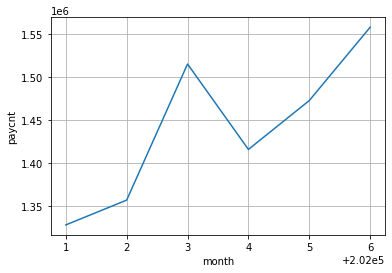

In [78]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="paycnt", data=OnlineCard)
ax1.grid()

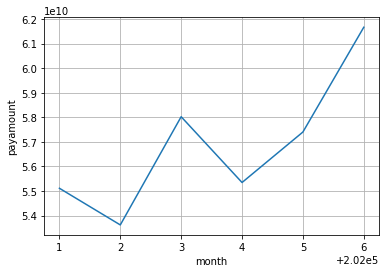

In [79]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="payamount", data=OnlineCard)
ax1.grid()

(-1.0, 4.0)

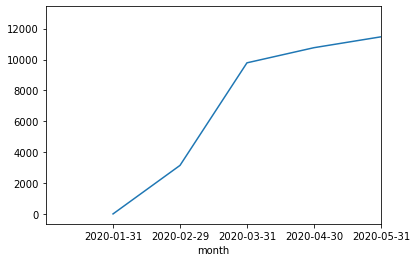

In [86]:
plt.plot(month['date'], month['confirmed'])
plt.xlabel('month')
plt.xlim(-1, 4)

(1.0, 7.0)

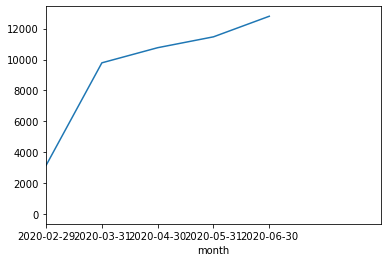

In [87]:
plt.plot(month['date'], month['confirmed'])
plt.xlabel('month')
plt.xlim(1,7)

In [88]:
month = time.iloc[[11, 40, 71, 101, 132, 162]].reset_index(drop=True)

In [89]:
month

,date,time,test,negative,confirmed,released,deceased
0,2020-01-31,16,312,245,11,0,0
1,2020-02-29,16,94055,55723,3150,28,17
2,2020-03-31,0,410564,383886,9786,5408,162
3,2020-04-30,0,619881,600482,10765,9059,247
4,2020-05-31,0,910822,876060,11468,10405,270
5,2020-06-30,0,1273766,1240157,12800,11537,282


In [90]:
month = month[['date', 'confirmed']]

In [91]:
confirmed = month.drop(0).reset_index(drop=True)['confirmed'] - month['confirmed']

In [92]:
confirmed = confirmed.drop(5)

In [93]:
confirmed.index = [1, 2, 3, 4, 5]

In [94]:
confirmed

1    3139.0
2    6636.0
3     979.0
4     703.0
5    1332.0
Name: confirmed, dtype: float64

In [95]:
month.loc[:, 'confirmed'] = confirmed

C:\Users\ksko\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
month = month.drop(0)

In [97]:
month['confirmed']

1    3139.0
2    6636.0
3     979.0
4     703.0
5    1332.0
Name: confirmed, dtype: float64

In [98]:
month.date = ['2','3','4','5','6']

(-1.0, 4.0)

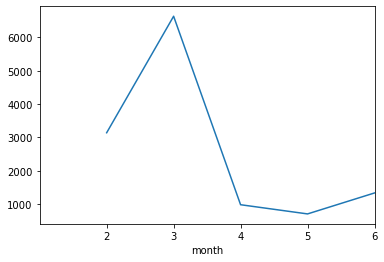

In [99]:
plt.plot(month['date'], month['confirmed'])
plt.xlabel('month')
plt.xlim(-1, 4)

Text(0.5, 0, 'date')

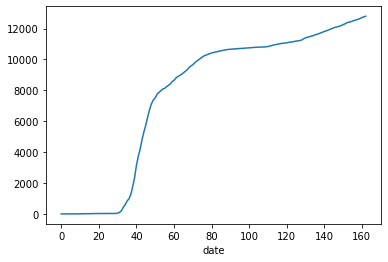

In [116]:
plt.plot(time['confirmed'])
plt.xlabel('date')

In [105]:
OnlineCard['confirmed'] = time.iloc[[11, 40, 71, 101, 132, 162]]['confirmed']

In [106]:
OnlineCard.corr()

,month,age,paycnt,payamount,confirmed
month,1.000000,NaN,0.828458,0.777392,NaN
age,NaN,NaN,NaN,NaN,NaN
paycnt,0.828458,NaN,1.000000,0.913655,NaN
payamount,0.777392,NaN,0.913655,1.000000,NaN
confirmed,NaN,NaN,NaN,NaN,NaN


In [109]:
time.iloc[[11, 40, 71, 101, 132, 162]]['confirmed'].reset_index(drop=True)

0       11
1     3150
2     9786
3    10765
4    11468
5    12800
Name: confirmed, dtype: int64

In [111]:
OnlineCard['confirmed'] = time.iloc[[11, 40, 71, 101, 132, 162]]['confirmed'].reset_index(drop=True)

In [113]:
OnlineCard.corr()

,month,age,paycnt,payamount,confirmed
month,1.000000,NaN,0.828458,0.777392,0.930621
age,NaN,NaN,NaN,NaN,NaN
paycnt,0.828458,NaN,1.000000,0.913655,0.878439
payamount,0.777392,NaN,0.913655,1.000000,0.714151
confirmed,0.930621,NaN,0.878439,0.714151,1.000000


---

# <논리전개>

http://hannun.or.kr/2021/4-1/

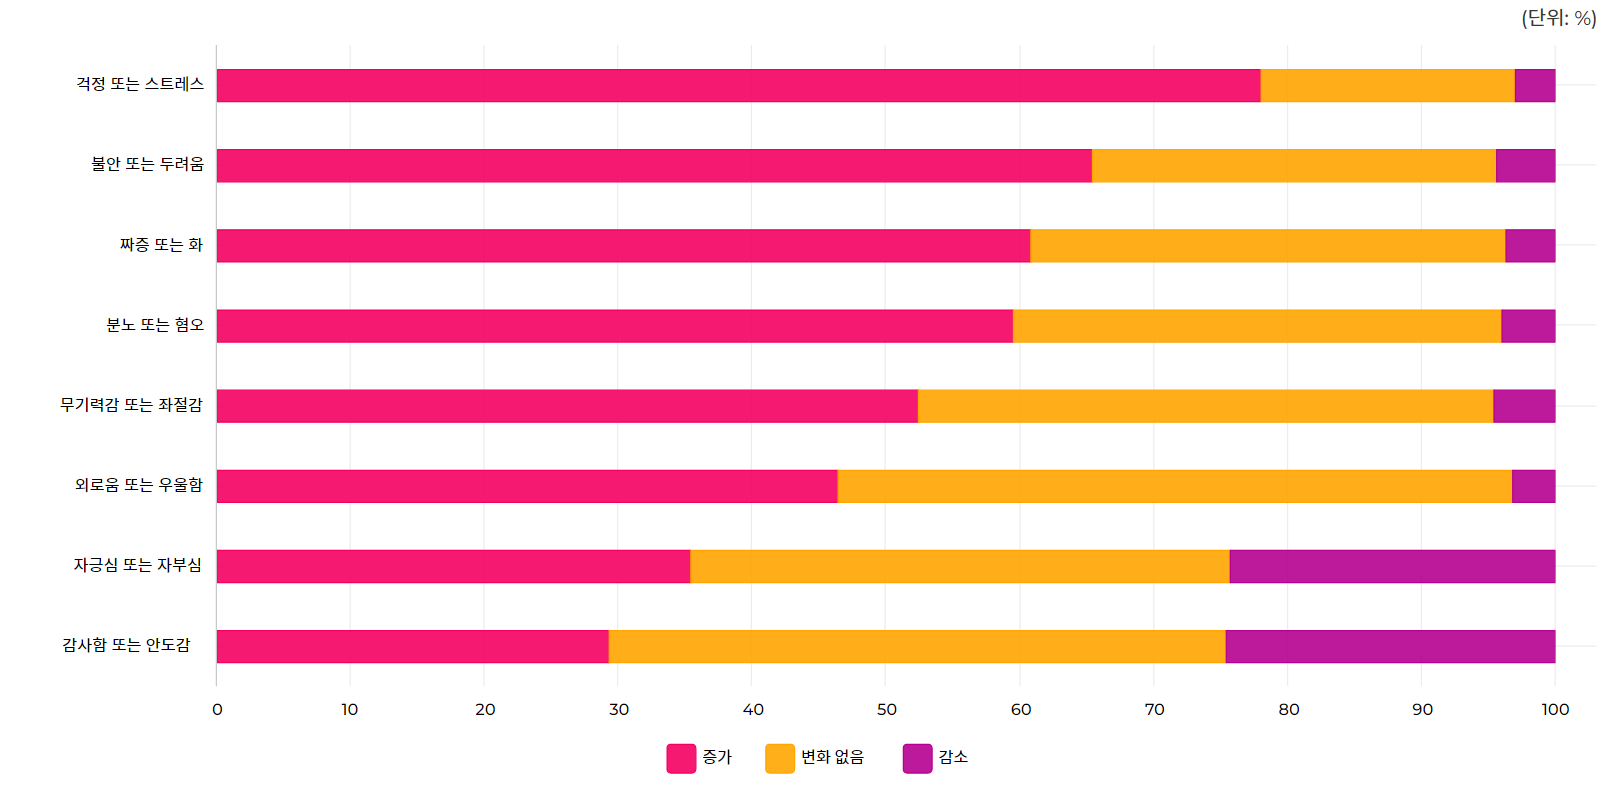

코로나로 인한 감정변화

## 다음은 코로나로 인한 감정변화를 나타낸 그래프이다.

## 걱정, 스트레스, 불안, 분노, 좌절, 우울 등 부정적인 감정이 모두 증가했음을 볼 수 있다.



http://digitalchosun.dizzo.com/site/data/html_dir/2018/08/09/2018080912426.html

성인남녀 10명 중 9명은 스트레스 해소를 위해 지출을 하는 감정소비를 하고 있다고 답했다. 최근 홧김에 충동적으로 소비를 하는 '홧김비용', 소소하게 낭비하는 재미 ‘탕진잼’ 등 소비를 통해 심리적 안정을 얻는 감정소비와 관련된 신조어가 유행하고 있다. 감정소비에 대한 인식을 살펴보자.

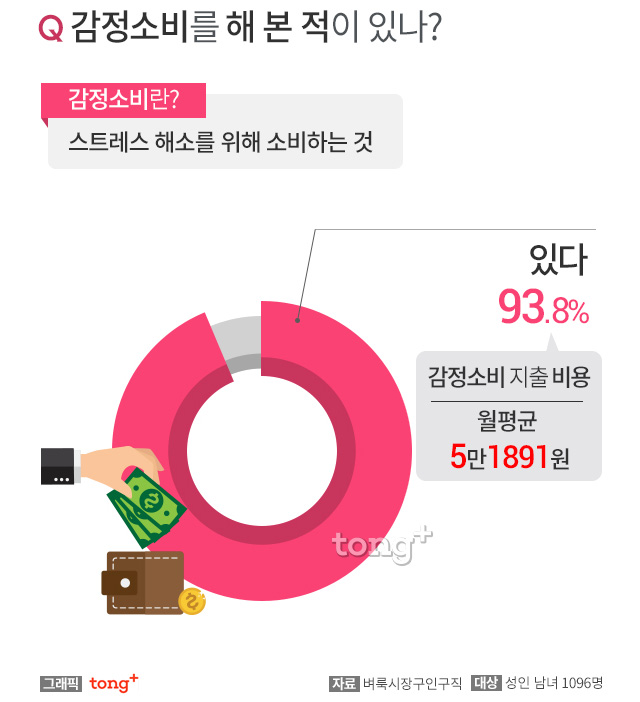

## 성인 남녀 93.8%가 감정 소비를 해 본 적이 있다고 답하였다.


(-1.0, 4.0)

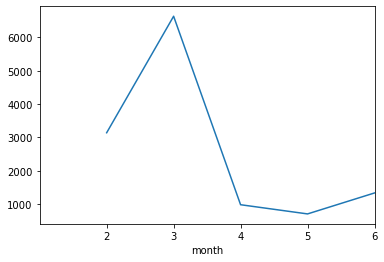

In [43]:
plt.plot(month['date'], month['confirmed'])
plt.xlabel('month')
plt.xlim(-1, 4)

## ↑ 다음은 2~6월의 코로나 신규 확진자이다.

## 신규 확진자가 많이 나타났을 때 스트레스를 많이 받았을 것이라 생각하고, 온라인 카드 소비 데이터를 살펴보았다.

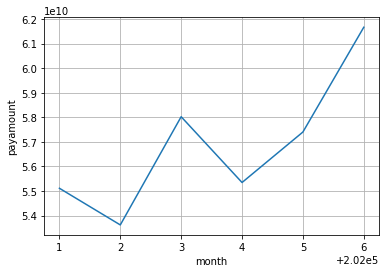

In [295]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="payamount", data=OnlineCard)
ax1.grid()

## 신규 확진자는 3월 6월에 증가하고, 4월에 감소하는 경향을 보였는데, 온라인 카드 소비 데이터 또한 3월 6월에 증가하고 4월에 감소하는 경향을 보였다.

## 즉, 신규확진자와 온라인 카드소비가 비슷한 추이를 보인다.

## 스트레스를 받은 사람들이 해당 시기에 감정소비를 했다고 볼 수 있다. <<< X 근거없음.

(검정 너무 부실, 상관관계 낮게 나왔는데 (0.11).. 조작?)

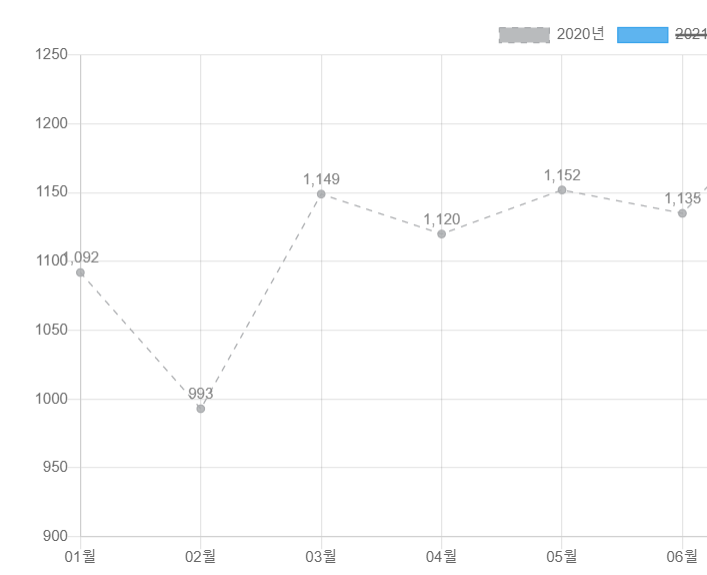

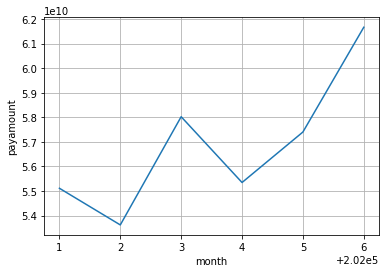

In [295]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="payamount", data=OnlineCard)
ax1.grid()

## 또한 온라인 카드 소비와 자살율을 비교해보면 비슷한 추이를 보이는 것을 볼 수 있다.

https://kfsp-datazoom.org/korea04.do
자살율 현황

## 코로나 19의 확산은 스트레스를 유발하며 이에 따른 스트레스는 감정소비를 일으킨다고 추측해볼 수 있다.

## 또한 온라인 카드소비와 자살율은 0.694의 높은 상관관계를 보였다.


In [302]:
OnlineCard['dep'] = [1092, 993, 1149, 1120, 1152, 1135]

In [304]:
OnlineCard.corr()

,month,age,paycnt,payamount,dep
month,1.000000,NaN,0.828458,0.777392,0.591258
age,NaN,NaN,NaN,NaN,NaN
paycnt,0.828458,NaN,1.000000,0.913655,0.694691
payamount,0.777392,NaN,0.913655,1.000000,0.683610
dep,0.591258,NaN,0.694691,0.683610,1.000000


In [3]:
OnlineCard

NameError: name 'OnlineCard' is not defined

## 코로나 19로 인한 감정소비와 코로나 블루(우울증)에 대한 대책 마련이 필요한데 방안이 없을까?

https://www.dbpia.co.kr/pdf/pdfView.do?nodeId=NODE11049246

## 해당 논문에 따르면 언론에 '분노 표출'과 관련된 단어들, 예컨데 격한 반응을 보였다, 거칠게 항의했다 등과 같은 단어들이 자주 등장할 때  이것이 수용자에게 큰 영향을 주며,
## '파괴, 범람, 비극' 등과 같은 단어들이 자주 사용될 때 수용자들은 두려움이나 고통, 공포 등 부정적 감정을 강하게 느꼈다고 한다.



## 여기에서 착안하여, 저희는 1차적으로 코로나19에 관련된 뉴스를 자연어처리를 통해 구별해 낸 뒤,
## 해당 기사들에 긍정인지 부정인지를 감정분석을 통하여 분석해내서
## 부정적 기사보단 긍정적인 기사가 더 위에 뜨게 하는 프로세스를 제안합니다.

## 여기서 자연어 처리란 ~~ 입니다.